In [13]:
from __future__ import print_function, division

%matplotlib inline
%precision 3

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import thinkplot

from matplotlib import rc
rc('animation', html='html5')
from Cell2D import Cell2D, Cell2DViewer


In [466]:
class Intersection(Cell2D):

    def __init__(self, numSlane=1, numNlane=1, numWlane=1, numElane=1, leftElane=0, leftSlane=0, leftNlane=0, leftWlane=0):
        self.whiteSpaceConst = 7
        m = numNlane*2 + numSlane*2  + self.whiteSpaceConst * 2 + 1 + 2 * leftNlane + 2 * leftSlane
        n = numElane * 2 + numWlane*2 + self.whiteSpaceConst * 2 + 1 + 2 * leftElane + 2 * leftWlane
        print(n,m)
        
        self.array = np.zeros((n, m), np.float)
        for i in range(self.whiteSpaceConst):
            laneConst = 0
            for j in range(numNlane):
                if j is 0:
                    self.array[i, self.whiteSpaceConst + laneConst] = 1
                    self.array[n- i -1, self.whiteSpaceConst + laneConst] = 1
                else:
                    self.array[i, self.whiteSpaceConst + laneConst] = .2
                    self.array[n-i-1, self.whiteSpaceConst + laneConst] = .2
                laneConst = laneConst + 2


            for j in range(leftNlane):
                self.array[i, self.whiteSpaceConst + laneConst] = .5
                if j == 0:
                    self.array[n-i-1, self.whiteSpaceConst + laneConst ] = 1
                else:
                    self.array[n-i-1, self.whiteSpaceConst + laneConst ] = .5
                self.array[n-i-1, self.whiteSpaceConst + laneConst + 2] = .5
                laneConst = laneConst + 2

                
            for j in range(numSlane):
                if j is 0:
                    if(leftNlane):
                        self.array[i, self.whiteSpaceConst + laneConst] = 1
                    else:
                        self.array[i, self.whiteSpaceConst + laneConst] = 1
                        self.array[n- i -1, self.whiteSpaceConst + laneConst] = 1
                else:
                    self.array[i, self.whiteSpaceConst + laneConst] = .2
                    self.array[n-i-1, self.whiteSpaceConst + laneConst] = .2
                laneConst = laneConst + 2
            
            self.array[i, self.whiteSpaceConst + laneConst] = 1
            self.array[n-i-1, self.whiteSpaceConst + laneConst] = 1
            laneConst = 0
            for j in range(numElane):
                if j is 0:
                    self.array[self.whiteSpaceConst + laneConst, i] = 1
                    self.array[ self.whiteSpaceConst + laneConst, m- i -1] = 1
                else:
                    self.array[self.whiteSpaceConst + laneConst, i ] = .2
                    self.array[ self.whiteSpaceConst + laneConst, m-i-1] = .2
                laneConst = laneConst + 2
                
            for j in range(leftWlane):
                self.array[self.whiteSpaceConst + laneConst + 2, i] = .5
                if j == 0:
                    self.array[self.whiteSpaceConst + laneConst, i] = 1
                else:
                    self.array[ self.whiteSpaceConst + laneConst, m-i-1] = .5
                self.array[ self.whiteSpaceConst + laneConst, m-i-1] = .5
                self.array[ self.whiteSpaceConst + laneConst + 2, i] = .5
                laneConst = laneConst + 2
            
            for j in range(numWlane):
                if j is 0:
                    if(leftWlane):
                        self.array[self.whiteSpaceConst + laneConst, i] = 0.5

                    else:
                        self.array[self.whiteSpaceConst + laneConst, i] = 1
                        self.array[ self.whiteSpaceConst + laneConst, m- i -1] = 1
                    
                else:
                    self.array[self.whiteSpaceConst + laneConst, i] = .2
                    self.array[self.whiteSpaceConst + laneConst, m- i -1] = .2
                laneConst = laneConst + 2
            
            self.array[self.whiteSpaceConst + laneConst, i] = 1
            self.array[self.whiteSpaceConst + laneConst, m- i -1] = 1
            

            
       # print(self.array)
    def step(self):
        self.array[self.whiteSpaceConst + 1, 0] = 0.7

In [467]:
class IntersectionView(Cell2DViewer):
    cmap = plt.get_cmap('spectral_r')
intersection = Intersection(numNlane=2, numSlane=2, numElane=2, numWlane=3, leftNlane=0, leftWlane=2)
viewer = IntersectionView(intersection)

29 23


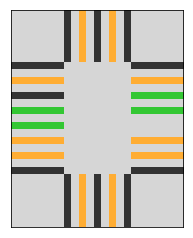

In [468]:
anim = viewer.animate()

In [450]:
anim